In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite") #sqlite:///hawaii.sqlite

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# View all of the classes that automap found
Base.classes.keys()

# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [4]:
inspect = inspect(engine)
inspect.get_table_names()

['measurement', 'station']

In [5]:
columns = inspect.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
columns = inspect.get_columns('station')
for column in columns:
    print(column['name'], column['type'])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
result = session.execute('SELECT count(*) FROM measurement').fetchall()
print(result)

[(19550,)]


In [8]:
# Find the most recent date in the data set.
most_recent = session.execute('SELECT MAX(date) FROM measurement').fetchall()
print(most_recent)

[('2017-08-23',)]


In [22]:
start = '2017-08-23'

In [24]:
date_list = start.split("-")

In [25]:
print(date_list)

['2017', '08', '23']


In [50]:
#datetime.datetime(int(date_list[0]), int(date_list[1]), int(date_list[2]))
#something = datetime.datetime(int(date_list[0]), int(date_list[1]), int(date_list[2]))
something = datetime.datetime(int(date_list[0]), int(date_list[1]), int(date_list[2]))
#datetime.datetime(int(date_list[0]), int(date_list[1]), int(date_list[2]))

In [55]:
max_temp = session.execute(f'SELECT MAX(tobs) FROM measurement where date >= {start}').fetchall()
#max_temp = session.execute(f'SELECT MAX(tobs) FROM measurement where date >= something'.fetchall())
#max_temp = session.execute('SELECT MAX(tobs) FROM measurement where date >= [datetime.datetime]').fetchall()
#max_temp = session.execute('SELECT MAX(tobs) FROM measurement where date >= datetime.datetime').fetchall()
#max_temp = session.execute('SELECT MAX(tobs) FROM measurement where date >= (datetime.datetime(int(date_list[0]), int(date_list[1]), int(date_list[2])))').fetchall()
print(max_temp)

[(87.0,)]


In [9]:
#dates = session.execute("'SELECT date FROM measurement where date ilike '2020%'").fetchall()
dates = session.execute('SELECT date FROM measurement limit 10').fetchall()
print(dates)

[('2010-01-01',), ('2010-01-02',), ('2010-01-03',), ('2010-01-04',), ('2010-01-06',), ('2010-01-07',), ('2010-01-08',), ('2010-01-09',), ('2010-01-10',), ('2010-01-11',)]


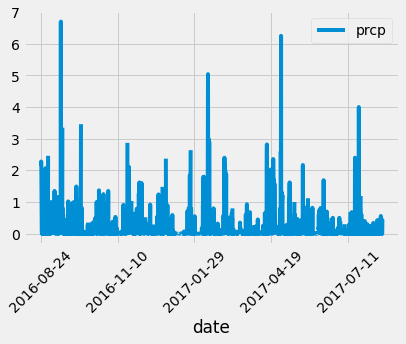

In [10]:
import datetime
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
end_date = datetime.datetime(2017, 8, 23)
start_date = end_date - datetime.timedelta(days = 365)
#print(start_date)


# Perform a query to retrieve the data and precipitation scores

prcp_results = session.query(measurement.date, measurement.prcp)\
.filter(measurement.date>= start_date).all()
#print(prcp_results)
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp_results)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("date")
#prcp_df
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(x= "date", rot= 45)


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_quantity = session.execute('SELECT count(distinct station) FROM station').fetchall()
print(station_quantity)


[(9,)]


In [13]:
# Design a query to calculate the total number stations in the dataset
station_quantity_alt = session.execute('SELECT count(distinct station) FROM measurement').fetchall()
print(station_quantity_alt)


[(9,)]


In [14]:
stationss = session.execute('SELECT station FROM station ;').fetchall()
stationss

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [15]:
stationss = session.execute('SELECT station FROM station ;').fetchall()
#stationss
type(stationss)

list

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.execute('SELECT station, count(station) FROM measurement GROUP BY station ORDER BY count(station) DESC;').fetchall()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp = session.execute('SELECT MAX(tobs) FROM measurement where station = "USC00519281"').fetchall()
print(max_temp)

[(85.0,)]


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.execute('SELECT MIN(tobs) FROM measurement where station = "USC00519281"').fetchall()
print(min_temp)

[(54.0,)]


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
avg_temp = session.execute('SELECT avg(tobs) FROM measurement where station = "USC00519281"').fetchall()
print(avg_temp)

[(71.66378066378067,)]


Text(0.5, 0, 'Temperature')

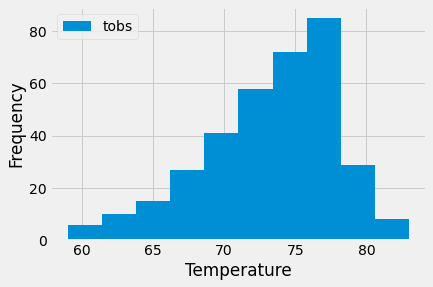

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
## Calculate the date one year from the last date in data set.
end_date = datetime.datetime(2017, 8, 23)
start_date = end_date - datetime.timedelta(days = 365)
##print(start_date)


## Perform a query to retrieve the data and precipitation scores

tobs_results = session.query(measurement.date, measurement.tobs)\
.filter(measurement.date>= start_date)\
.filter(measurement.station == "USC00519281").all()
##print(prcp_results)
## Save the query results as a Pandas DataFrame and set the index to the date column

tobs_df = pd.DataFrame(tobs_results)

## Sort the dataframe by date
#tobs_df = tobs_df.sort_values("date")
##prcp_df
## Use Pandas Plotting with Matplotlib to plot the data

tobs_df.plot.hist()
plt.xlabel("Temperature")


In [21]:
tobs_df

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


# Close session

In [69]:
# Close Session
session.close()